In [1]:
# Basic setting
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Optimization of Linear Regression

In [4]:
# Load the dataset
with open('./data/linear_regression.pickle', 'rb') as f:
    X, y = pickle.load(f)

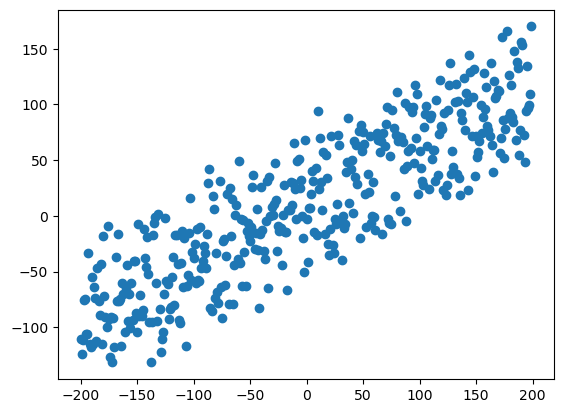

In [5]:
# Check the dataset distribution    
plt.scatter(X, y)
plt.show()

## [P.1] 데이터를 학습 데이터와 평가 데이터로 나누기

In [6]:
# Use sklearn library
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

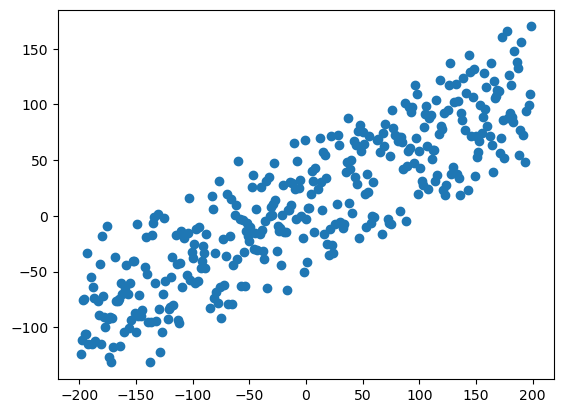

In [10]:
# Visualize train dataset  
plt.scatter(X_train, y_train)
plt.show()

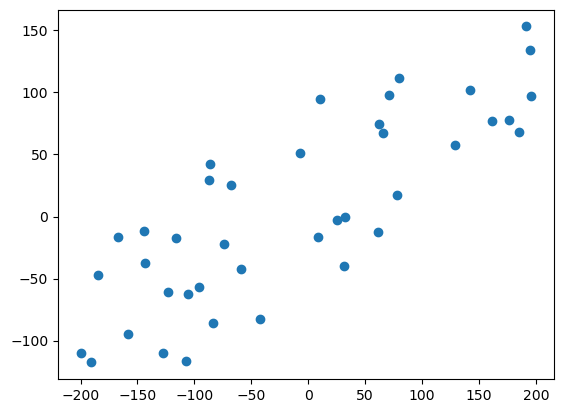

In [11]:
# Visualize train dataset  
plt.scatter(X_test, y_test)
plt.show()

## [P.2] <font color=red>numpy</font> 라이브러리를 활용해, 최적의 선형 회귀 모델 찾기

- 최적의 모델은 모든 데이터에 대해 실제값과 예측값의 차이가 제일 작은 모델
- 선형 회귀 모델은  일반적으로 <font color=red>MSE(Mean Squared Error)</font> 손실을 최소화하도록 학습
- 손실 함수와 모델 파라미터의 gradient에 관한 빈칸 부분 채워넣기

**MSE 손실 함수**
\begin{equation*}
\left( \frac{1}{n} \sum_{i=1}^n (y_i - (wX_i + b))^2 \right)
\end{equation*}

**Gradients 계산**
\begin{equation*}
\frac{\partial L}{\partial w} = -2 * \frac{1}{n} \sum_{i=1}^n (y_i - (wX_i + b)) * X_i
\end{equation*}

\begin{equation*}
\frac{\partial L}{\partial b} = -2 * \frac{1}{n} \sum_{i=1}^n (y_i - (wX_i + b))
\end{equation*}

In [40]:
def gd_numpy(X, y, epochs, lr):
    # Model weights and bias parameters
    w = 0.0
    b = 0.0

    # Store model parameters and loss for visualization
    w_list, b_list, loss_list = [], [], []

    # Perform Gradient Descent
    for i in range(epochs):



    #################################################
    ######## Hint: use +, -, *, /, **, np.mean() ########
        loss = np.mean((y-(w*X+b))**2)   # MSE loss

        dw = -2*np.mean((y-(w*X+b))*X)   # derivative w.r.t to w
        db = -2*np.mean(y-(w*X+b))   # derivative w.r.t to b
    #################################################


        w = w - dw*lr   # update w
        b = b- db*lr   # update b

        w_list.append(w)
        b_list.append(b)
        loss_list.append(loss)

    print('Trained model weights : %.4f' % w)
    print('Trained model bias : %.4f' % b)
    
    return w, b, w_list, b_list, loss_list

In [41]:
# Training setting
epochs = 1000
learning_rate = 1e-7 #10의 -7승 값

w, b, w_list, b_list, loss_list = gd_numpy(X_train, y_train, epochs, learning_rate)

Trained model weights : 0.4843
Trained model bias : 0.0020


In [42]:
# get train loss
y_pred = w*X_train + b

train_loss = np.mean((y_train - y_pred)**2)
print('Train Loss for LinearRegression model : %.4f' % train_loss)

Train Loss for LinearRegression model : 1210.1167


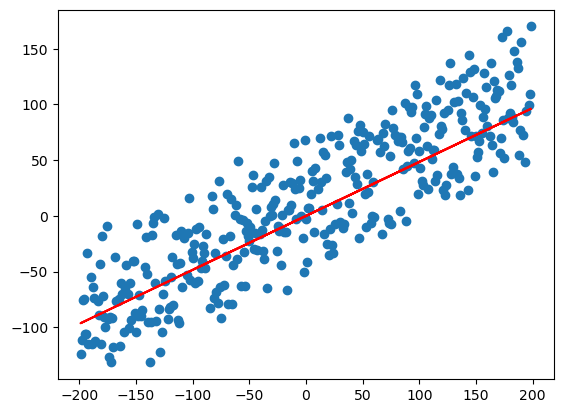

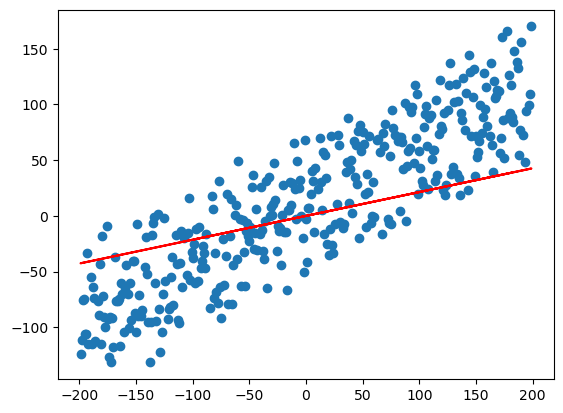

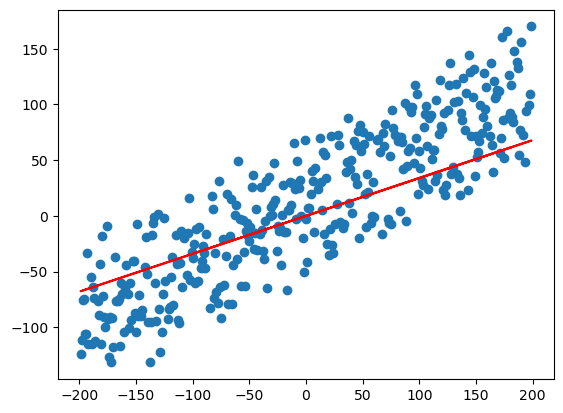

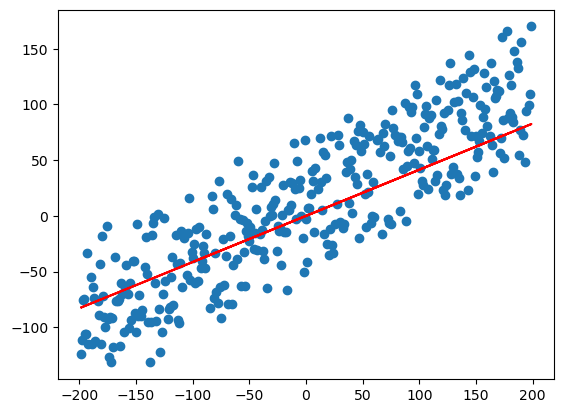

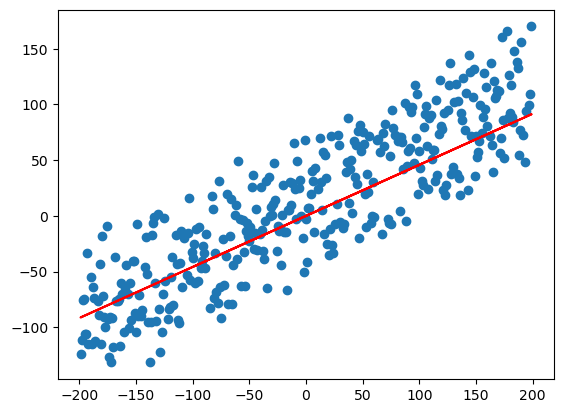

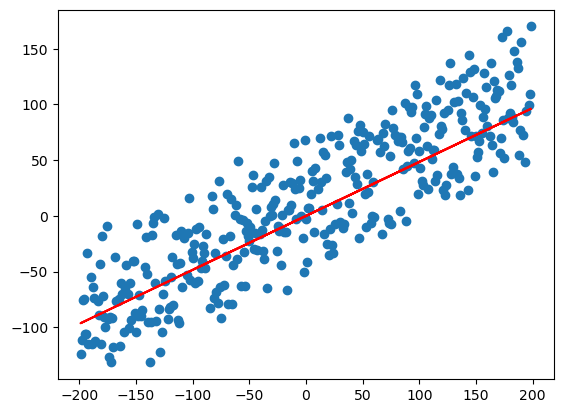

In [58]:
# Visualize the intermediate trained model
nums = 6
epochs_list = [round(epochs / (nums-1) * n) for n in range(nums)]

for i in range(len(epochs_list)):
    plt.scatter(X_train, y_train)   # scatter the original data
    
    # Load trained weights in specific epoch
    epoch = epochs_list[i] - 1   # In python, all indexes start from 0
  
    if epoch >= 1000:
        epoch= 999
    w = w_list[epoch]
    b = b_list[epoch]
    
    y_pred = (w *X_train) + b
    plt.plot(X_train, y_pred, color='red')
    plt.show()

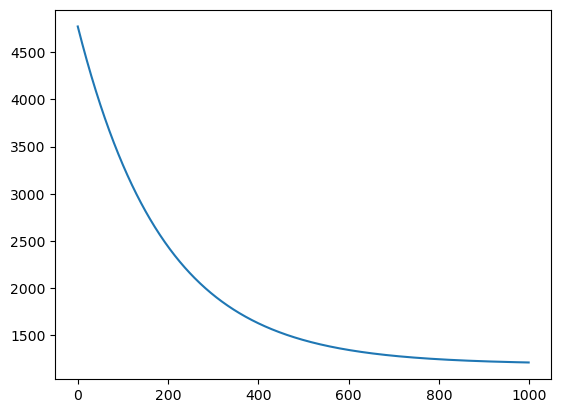

In [59]:
# Visualize the change of loss
plt.plot(loss_list)
plt.show()

### 평가 데이터에 대한 예측 결과는 다음과 같음

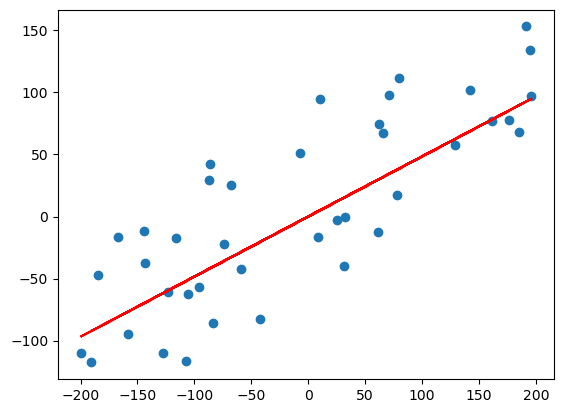

In [46]:
# Visualize the trained linear regression model
# scatter the original data
plt.scatter(X_test, y_test)   

# plot prediction results
y_pred = w * X_test + b

plt.plot(X_test, y_pred, color='red')
plt.show()

### 학습된 선형 회귀 모델의 성능은 평가 데이터셋에 대한 손실임

In [48]:
test_loss = np.mean((y_test - y_pred)**2)
print('Test Loss for LinearRegression model : %.4f' % test_loss)

Test Loss for LinearRegression model : 1955.3655


## [P.3] <font color=red>sklearn</font> 라이브러리의 `LinearRegression` 모델을 활용해, 최적의 선형 회귀 모델 찾기

- 이 모듈은 경사하강법 대신 최소제곱법(Least Squares Method)를 사용해 모델 학습

In [49]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn.linear_model import LinearRegression

In [71]:
X_train.reshape(-1,1)

array([[ 181],
       [-145],
       [-124],
       [-175],
       [-118],
       [ 182],
       [ -52],
       [ -19],
       [-178],
       [ -27],
       [-154],
       [ 121],
       [ 138],
       [-130],
       [ 174],
       [-161],
       [  23],
       [ -28],
       [-170],
       [ -48],
       [ -76],
       [  94],
       [  55],
       [-122],
       [ -99],
       [-169],
       [ 152],
       [  68],
       [ 194],
       [-127],
       [ 120],
       [ -60],
       [-195],
       [-155],
       [ 188],
       [  46],
       [  27],
       [ 169],
       [ -24],
       [  89],
       [-197],
       [-182],
       [   2],
       [  50],
       [  74],
       [-137],
       [  48],
       [ 101],
       [ -92],
       [-110],
       [  33],
       [ 135],
       [ -82],
       [  20],
       [ -20],
       [ 114],
       [ 173],
       [ 180],
       [  39],
       [-125],
       [  47],
       [ -90],
       [-184],
       [-134],
       [ -47],
       [-193],
       [-1

In [53]:
def lr_sklearn(X, y):
    X_2d = X.reshape(-1,1)
    
    reg = LinearRegression().fit(X_2d, y)
    
    w = reg.coef_.item()
    b = reg.intercept_.item()

    print('Trained model weights : %.4f' % w)
    print('Trained model bias : %.4f' % b)
    
    return reg

In [54]:
model = lr_sklearn(X_train, y_train)

Trained model weights : 0.5210
Trained model bias : 9.9940


In [55]:
# get train loss
y_pred = model.predict(X_train.reshape(-1, 1))

train_loss = np.mean((y_train - y_pred)**2)
print('Train Loss for LinearRegression model : %.4f' % train_loss)

Train Loss for LinearRegression model : 1091.9456


### 평가 데이터에 대한 예측 결과는 다음과 같이 시각화

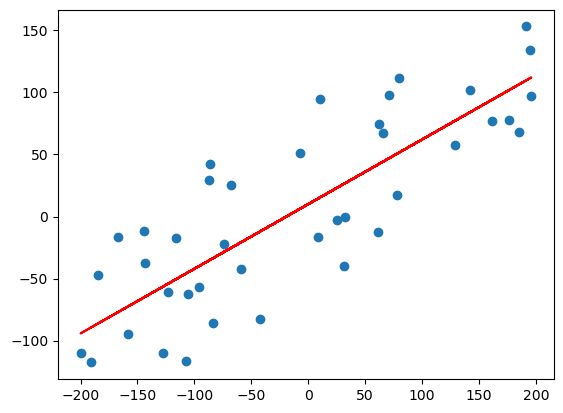

In [56]:
# Visualize the trained linear regression model
# scatter the original data
plt.scatter(X_test, y_test)   

# plot prediction results
y_pred = model.predict(X_test.reshape(-1, 1))

plt.plot(X_test, y_pred, color='red')
plt.show()

In [66]:
# get test loss
test_loss = np.mean((y_test - y_pred)**2)
print('Test Loss for LinearRegression model : %.4f' % test_loss)

Test Loss for LinearRegression model : 1960.0509


## [P.4] <font color=red>sklearn</font> 라이브러리의 `SGDRegression` 모델을 활용해, 최적의 선형 회귀 모델 찾기

- 이 모듈은 경사하강법을 사용해 모델 학습

In [60]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html
from sklearn.linear_model import SGDRegressor

In [61]:
def gd_sklearn(X, y, epochs, lr, alpha):
    X_2d = X.reshape(-1, 1)
    
    reg = SGDRegressor(penalty='l2', 
                       alpha=alpha,
                       max_iter=epochs,
                       tol=1e-3,
                       learning_rate='invscaling',
                       eta0=lr,
                       random_state=42)
    
    reg.fit(X_2d, y)
    
    w = reg.coef_.item()
    b = reg.intercept_.item()

    print('Trained model weights : %.4f' % w)
    print('Trained model bias : %.4f' % b)
    
    return reg

In [62]:
# training setting
epochs = 1000
lr = 1e-5
alpha = 0.001

model = gd_sklearn(X_train, y_train, epochs, lr, alpha)

Trained model weights : 0.5177
Trained model bias : 0.0850


In [63]:
# get train loss
y_pred = model.predict(X_train.reshape(-1, 1))

train_loss = np.mean((y_train - y_pred)**2)
print('Train Loss for LinearRegression model : %.4f' % train_loss)

Train Loss for LinearRegression model : 1190.3299


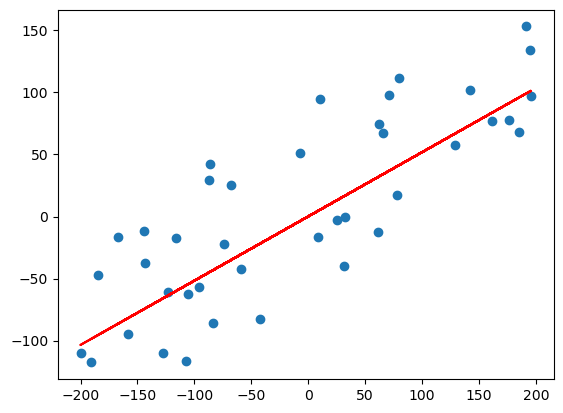

In [64]:
# Visualize the trained linear regression model
# scatter the original data
plt.scatter(X_test, y_test)   

# plot prediction results
y_pred = model.predict(X_test.reshape(-1, 1))

plt.plot(X_test, y_pred, color='red')
plt.show()

In [65]:
# get test loss
test_loss = np.mean((y_test - y_pred)**2)
print('Test Loss for LinearRegression model : %.4f' % test_loss)

Test Loss for LinearRegression model : 1960.0509


`sklearn` 라이브러리를 사용하면, 별도의 gradient 계산 없이 모델을 쉽게 학습시킬 수 있음